# Загрузка данных

In [ ]:
# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
import pandas as pd             # импортируем библиотеку обработки и анализа данных pandas
import matplotlib.pyplot as plt # импортируем модуль pyplot библиотеки matplotlib для построения графиков
import seaborn as sns           # визуализация
import datetime                 # импортируем модуль datetime для обработки данных в формете даты
import numpy as np              # Импортируем библиотеку numpy
# from google.colab import files  # импортируем библиотеку files для работы с файлами
import re                       # регулярные выражения
import pickle                   # для загрузки-сохранения обьектов

from sklearn.preprocessing import LabelEncoder, StandardScaler # перевод в категориальные данные и стандартизация данных

# Рисовать графики сразу же
%matplotlib inline

In [ ]:
# прочитаем файл
df = pd.read_csv('http://m.ufamax.eu:8080/belka/citystar.csv') # загружаем со своего сервера

In [ ]:
df.head(5) # первые 5 строк

,photo_url,planning,date,apart_type,district,address,floor,area1,area2,area3,comment,price,phone,name,agency,email
0,http://citystar.ru/img.aspx?/fs/mq/9bd3ff00939...,раздельная,13.05,Трехкомнатная раздельная,Ленинский,Куйбышева 12,1/3,57.0,35.0,8.0,Трехкомнатная квартира нестандартной планировк...,2850,+79615797796,Дедевич Алексей Константинович,Выбор,vubor34@mail.ru
1,http://citystar.ru/img.aspx?/fs/0c/30bfcca8a96...,нестандартная,12.05,Трехкомнатная нестандартная,Орджоникидзевский,50-летия Магнитки 31,3/9,98.5,60.0,15.0,Продам трехкомнатную квартиру 100кв.м. Простор...,6990,8 951 235 77 55,Климов Евгений,"""Шанс""",agshans@mail.ru
2,http://citystar.ru/img.aspx?/fs/0d/c4a36e3da97...,старой планировки,19.05,Трехкомнатная старой планировки,Ленинский,Менделеева 6,3/4,83.0,55.0,9.0,ПРОДАМ трехкомнатную квартиру старой планировк...,5100,89128051276,Нестерова Айгуль Зинуровна,NaN,NaN
3,http://citystar.ru/img.aspx?/fs/g0/097f4353fdb...,малосемейка,19.05,Однокомнатная малосемейка,Правобережный,Ленина пр-т 98/1,7/9,30.4,17.0,6.0,Квартира малосемейка в хорошем состоянии. П...,1790,89128051254,Байгузина Юлия Владимировна,Визит,NaN
4,http://citystar.ru/img.aspx?/fs/0k/b06825c0aed...,NaN,19.05,Трехкомнатная,Ленинский,Ленина пр-т 10,5/5,77.0,48.0,9.0,КВАРТИРА СТАРОЙ ПЛАНИРОВКИ С ВЫСОКИМИ ПОТОЛКА...,3990,89128051254,Байгузина Юлия Владимировна,Визит,NaN


In [ ]:
# структура данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   photo_url   818 non-null    object 
 1   planning    198 non-null    object 
 2   date        880 non-null    float64
 3   apart_type  880 non-null    object 
 4   district    695 non-null    object 
 5   address     880 non-null    object 
 6   floor       880 non-null    object 
 7   area1       880 non-null    float64
 8   area2       880 non-null    float64
 9   area3       880 non-null    float64
 10  comment     872 non-null    object 
 11  price       880 non-null    int64  
 12  phone       874 non-null    object 
 13  name        880 non-null    object 
 14  agency      502 non-null    object 
 15  email       667 non-null    object 
dtypes: float64(4), int64(1), object(11)
memory usage: 110.1+ KB


Тип object означает строковые данные, часть pandas определил как числовые данные. Цены указаны в тыс.руб. определись как integer. Дата имеет неверный тип данных. Остальные поля также строковые, это хорошо.

In [ ]:
# размерность датафрейма
df.shape

(880, 16)

In [ ]:
# найдем пропуски 
# это результат парсинга и сохранения в базу varchar нулевой длины строки. в результате они стали NaN
# это может быть как случайная так и не случайная ошибка пропуска данных
df.isna().sum()

photo_url      62
planning      682
date            0
apart_type      0
district      185
address         0
floor           0
area1           0
area2           0
area3           0
comment         8
price           0
phone           6
name            0
agency        378
email         213
dtype: int64

In [ ]:
# взглянем на описательные статистики
display(df.describe())
display(df.describe(include=['O']))

,date,area1,area2,area3,price
count,880.000000,880.000000,880.000000,880.000000,880.000000
mean,15.811375,55.397489,30.241932,8.666818,3224.404545
std,8.194166,23.522630,18.955697,4.283164,1346.202953
min,1.020000,16.000000,0.000000,0.000000,0.000000
25%,10.030000,42.900000,18.000000,6.000000,2300.000000
50%,17.040000,54.550000,31.000000,8.000000,3134.500000
75%,22.022500,64.400000,42.000000,9.000000,3750.000000
max,31.030000,318.000000,150.000000,55.000000,10000.000000


,photo_url,planning,apart_type,district,address,floor,comment,phone,name,agency,email
count,818,198,880,695,880,880,872,874,880,502,667
unique,638,19,47,11,526,59,652,303,263,49,150
top,http://citystar.ru/img.aspx?/fs/xy/ccddb820a19...,нестандартная,Двухкомнатная,Орджоникидзевский,Карла Маркса 204/3,4/5,Предлагается к продаже трехкомнатная квартира ...,+79048146655,Татьяна,Рио-Люкс,riolux@mail.ru
freq,8,35,299,243,34,83,34,88,113,241,144


In [ ]:
# выведем уникальные значения по столбцам
uniq_cols = ['planning', 'apart_type', 'district', 'address',
       'floor', 'area1', 'area2', 'area3', 'comment', 'price', 'phone', 'name',
       'agency']
for col in uniq_cols:
  print(col,'\n',df[col].unique())

planning 
 ['раздельная' 'нестандартная' 'старой планировки' 'малосемейка' nan
 'брежневка' 'свердловский вариант' 'хрущевка' 'воркутинский вариант'
 'гребенка' 'студия' 'распашонка' 'хабаровский вариант' 'улучшенная'
 'сталинский вариант' 'индивидуальный проект' 'смежная'
 'гостиничного типа' 'немецкий вариант' '121 серия']
apart_type 
 ['Трехкомнатная раздельная' 'Трехкомнатная нестандартная'
 'Трехкомнатная старой планировки' 'Однокомнатная малосемейка'
 'Трехкомнатная ' 'Двухкомнатная ' 'Двухкомнатная брежневка'
 'Трехкомнатная свердловский вариант' 'Однокомнатная ' 'Многокомнатная '
 'Однокомнатная нестандартная' 'Двухкомнатная раздельная'
 'Трехкомнатная хрущевка' 'Двухкомнатная нестандартная'
 'Однокомнатная свердловский вариант' 'Трехкомнатная воркутинский вариант'
 'Двухкомнатная хрущевка' 'Трехкомнатная брежневка'
 'Двухкомнатная гребенка' 'Однокомнатная студия' 'Четырехкомнатная ' ' '
 'Двухкомнатная старой планировки' 'Трехкомнатная распашонка'
 'Однокомнатная хабаровский в

# Парсим и очищаем данные

In [ ]:
# еще раз взглянем на данные
df.head()

,photo_url,planning,date,apart_type,district,address,floor,area1,area2,area3,comment,price,phone,name,agency,email
0,http://citystar.ru/img.aspx?/fs/mq/9bd3ff00939...,раздельная,13.05,Трехкомнатная раздельная,Ленинский,Куйбышева 12,1/3,57.0,35.0,8.0,Трехкомнатная квартира нестандартной планировк...,2850,+79615797796,Дедевич Алексей Константинович,Выбор,vubor34@mail.ru
1,http://citystar.ru/img.aspx?/fs/0c/30bfcca8a96...,нестандартная,12.05,Трехкомнатная нестандартная,Орджоникидзевский,50-летия Магнитки 31,3/9,98.5,60.0,15.0,Продам трехкомнатную квартиру 100кв.м. Простор...,6990,8 951 235 77 55,Климов Евгений,"""Шанс""",agshans@mail.ru
2,http://citystar.ru/img.aspx?/fs/0d/c4a36e3da97...,старой планировки,19.05,Трехкомнатная старой планировки,Ленинский,Менделеева 6,3/4,83.0,55.0,9.0,ПРОДАМ трехкомнатную квартиру старой планировк...,5100,89128051276,Нестерова Айгуль Зинуровна,NaN,NaN
3,http://citystar.ru/img.aspx?/fs/g0/097f4353fdb...,малосемейка,19.05,Однокомнатная малосемейка,Правобережный,Ленина пр-т 98/1,7/9,30.4,17.0,6.0,Квартира малосемейка в хорошем состоянии. П...,1790,89128051254,Байгузина Юлия Владимировна,Визит,NaN
4,http://citystar.ru/img.aspx?/fs/0k/b06825c0aed...,NaN,19.05,Трехкомнатная,Ленинский,Ленина пр-т 10,5/5,77.0,48.0,9.0,КВАРТИРА СТАРОЙ ПЛАНИРОВКИ С ВЫСОКИМИ ПОТОЛКА...,3990,89128051254,Байгузина Юлия Владимировна,Визит,NaN


In [ ]:
# Исправим поле даты

# функция добавления к строке текущего года и возврат значения в формате ГОД-МЕСЯЦ-ДЕНЬ
def add_year(x):
  try:
    if (len(x)>2) and ('.' in x):
      x = datetime.date.today().strftime('%Y') + '.' + x # добавим текущий год
      return pd.to_datetime(x, format='%Y.%d.%m').strftime('%Y-%m-%d') # вернем правильную дату
    else:
      return np.nan # при ошибке вернем NaN
  except:
    return np.nan # при ошибке вернем NaN

df['date'] = df['date'].astype('str') # вернем тип str
df['date'] = [add_year(x) for x in df['date']] # добавим год к дате и запишем корректно дату 
df.head(1)

,photo_url,planning,date,apart_type,district,address,floor,area1,area2,area3,comment,price,phone,name,agency,email
0,http://citystar.ru/img.aspx?/fs/mq/9bd3ff00939...,раздельная,2023-05-13,Трехкомнатная раздельная,Ленинский,Куйбышева 12,1/3,57.0,35.0,8.0,Трехкомнатная квартира нестандартной планировк...,2850,+79615797796,Дедевич Алексей Константинович,Выбор,vubor34@mail.ru


In [ ]:
# получим столбцы с категориальными и числовыми данными
object_cols = [col for col in df.columns if df[col].dtype == "object"]
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

In [ ]:
# пропуски в категориальных данных
print(df[object_cols].isna().sum())
print()
# пропуски в числовых данных
print(df[numeric_cols].isna().sum())

photo_url      62
planning      682
date            0
apart_type      0
district      185
address         0
floor           0
comment         8
phone           6
name            0
agency        378
email         213
dtype: int64

area1    0
area2    0
area3    0
price    0
dtype: int64


пропуски у нас только в категориальных данных. это хорошо!

в категориальных NaN заменим на "-" (прочерк)

In [ ]:
# заменим категориальные NaN на "-"
df[object_cols] = df[object_cols].fillna('-')
# заменим числовые NaN на "-1"
df[numeric_cols] = df[numeric_cols].fillna(-1)

In [ ]:
# выведем уникальные значения по столбцам
uniq_cols = ['planning', 'apart_type', 'district', 'address',
       'floor', 'agency']
for col in uniq_cols:
  print(col,'\n',df[col].unique())

planning 
 ['раздельная' 'нестандартная' 'старой планировки' 'малосемейка' '-'
 'брежневка' 'свердловский вариант' 'хрущевка' 'воркутинский вариант'
 'гребенка' 'студия' 'распашонка' 'хабаровский вариант' 'улучшенная'
 'сталинский вариант' 'индивидуальный проект' 'смежная'
 'гостиничного типа' 'немецкий вариант' '121 серия']
apart_type 
 ['Трехкомнатная раздельная' 'Трехкомнатная нестандартная'
 'Трехкомнатная старой планировки' 'Однокомнатная малосемейка'
 'Трехкомнатная ' 'Двухкомнатная ' 'Двухкомнатная брежневка'
 'Трехкомнатная свердловский вариант' 'Однокомнатная ' 'Многокомнатная '
 'Однокомнатная нестандартная' 'Двухкомнатная раздельная'
 'Трехкомнатная хрущевка' 'Двухкомнатная нестандартная'
 'Однокомнатная свердловский вариант' 'Трехкомнатная воркутинский вариант'
 'Двухкомнатная хрущевка' 'Трехкомнатная брежневка'
 'Двухкомнатная гребенка' 'Однокомнатная студия' 'Четырехкомнатная ' ' '
 'Двухкомнатная старой планировки' 'Трехкомнатная распашонка'
 'Однокомнатная хабаровский в

In [ ]:
# уникальные по типу аппартаментов
df['apart_type'].unique()

array(['Трехкомнатная раздельная', 'Трехкомнатная нестандартная',
       'Трехкомнатная старой планировки', 'Однокомнатная малосемейка',
       'Трехкомнатная ', 'Двухкомнатная ', 'Двухкомнатная брежневка',
       'Трехкомнатная свердловский вариант', 'Однокомнатная ',
       'Многокомнатная ', 'Однокомнатная нестандартная',
       'Двухкомнатная раздельная', 'Трехкомнатная хрущевка',
       'Двухкомнатная нестандартная',
       'Однокомнатная свердловский вариант',
       'Трехкомнатная воркутинский вариант', 'Двухкомнатная хрущевка',
       'Трехкомнатная брежневка', 'Двухкомнатная гребенка',
       'Однокомнатная студия', 'Четырехкомнатная ', ' ',
       'Двухкомнатная старой планировки', 'Трехкомнатная распашонка',
       'Однокомнатная хабаровский вариант', 'Однокомнатная улучшенная',
       'Однокомнатная сталинский вариант',
       'Трехкомнатная сталинский вариант', 'Трехкомнатная улучшенная',
       'Двухкомнатная индивидуальный проект',
       'Двухкомнатная сталинский вариан

In [ ]:
# функция парсинга количества комнат
def get_apart_type(cell):
  res = 1 # по умолчанию 1 комната
  cell = cell.lower()
  if 'однокомн' in cell:
    res = 1
  if 'двухкомн' in cell:
    res = 2
  if 'трехкомн' in cell:
    res = 3
  if 'четырехкомн' in cell:
    res = 4
  if 'многокомн' in cell:
    res = -1 # много комнат
  return res

df['rooms'] = [get_apart_type(cell) for cell in df['apart_type']]
df = df.drop('apart_type', axis=1)
df.head()

,photo_url,planning,date,district,address,floor,area1,area2,area3,comment,price,phone,name,agency,email,rooms
0,http://citystar.ru/img.aspx?/fs/mq/9bd3ff00939...,раздельная,2023-05-13,Ленинский,Куйбышева 12,1/3,57.0,35.0,8.0,Трехкомнатная квартира нестандартной планировк...,2850,+79615797796,Дедевич Алексей Константинович,Выбор,vubor34@mail.ru,3
1,http://citystar.ru/img.aspx?/fs/0c/30bfcca8a96...,нестандартная,2023-05-12,Орджоникидзевский,50-летия Магнитки 31,3/9,98.5,60.0,15.0,Продам трехкомнатную квартиру 100кв.м. Простор...,6990,8 951 235 77 55,Климов Евгений,"""Шанс""",agshans@mail.ru,3
2,http://citystar.ru/img.aspx?/fs/0d/c4a36e3da97...,старой планировки,2023-05-19,Ленинский,Менделеева 6,3/4,83.0,55.0,9.0,ПРОДАМ трехкомнатную квартиру старой планировк...,5100,89128051276,Нестерова Айгуль Зинуровна,-,-,3
3,http://citystar.ru/img.aspx?/fs/g0/097f4353fdb...,малосемейка,2023-05-19,Правобережный,Ленина пр-т 98/1,7/9,30.4,17.0,6.0,Квартира малосемейка в хорошем состоянии. П...,1790,89128051254,Байгузина Юлия Владимировна,Визит,-,1
4,http://citystar.ru/img.aspx?/fs/0k/b06825c0aed...,-,2023-05-19,Ленинский,Ленина пр-т 10,5/5,77.0,48.0,9.0,КВАРТИРА СТАРОЙ ПЛАНИРОВКИ С ВЫСОКИМИ ПОТОЛКА...,3990,89128051254,Байгузина Юлия Владимировна,Визит,-,3


In [ ]:
# уникальные по районам
df['district'].unique()

array(['Ленинский', 'Орджоникидзевский', 'Правобережный', '-',
       'Орджоникидзевский (левый берег)', 'Ордженикидзевский',
       'ленинский', 'правобережный', 'Орджонекидзевский', 'Левый берег',
       'Ленинский (Левый берег)', 'орджоникидзевский'], dtype=object)

In [ ]:
# нас интересуют
# Ленинский, Орджоникидзевский, Правобережный, Орджоникидзевский (Левый берег) и Ленинский (левый берег)
# подправим названия
df['district'] = df['district'].replace('Левый берег', 'Орджоникидзевский')
df['district'] = df['district'].replace('Ордженикидзевский', 'Орджоникидзевский')
df['district'] = df['district'].replace('орджоникидзевский', 'Орджоникидзевский')
df['district'] = df['district'].replace('Орджонекидзевский', 'Орджоникидзевский')
df['district'] = df['district'].replace('ленинский', 'Ленинский')
df['district'] = df['district'].replace('правобережный', 'Правобережный')
df['district'] = df['district'].replace('Ленинский (Левый берег)', 'Ленинский (левый берег)')

# df[df['district']=='Левый берег']

# уникальные по районам
df['district'].unique()

array(['Ленинский', 'Орджоникидзевский', 'Правобережный', '-',
       'Орджоникидзевский (левый берег)', 'Ленинский (левый берег)'],
      dtype=object)

In [ ]:
# уникальные по адресам
df['address'].unique()

array(['Куйбышева 12', '50-летия Магнитки 31', 'Менделеева 6',
       'Ленина пр-т 98/1', 'Ленина пр-т 10', 'Жукова 3',
       'Лесопарковая 96', 'Калмыкова 12', 'Доменщиков 1',
       'Суворова 120/1', 'уральская 7/1', 'ул Сельская 27',
       'Ленина пр-т 150', 'Карла Маркса 233', 'Пионерская 21',
       'Ленина пр-т 91', 'ул. Курортная 85к7', 'ул Октябрьская 22к1',
       'Октябрьская 26', 'Тевосяна 6/1', 'Сочинская 45/1',
       'Ленина пр-т 137', 'Индустриальная 22/1', 'Карла Маркса 185',
       'Зеленый Лог 34', 'Зеленый Лог 21/1', 'Завенягина 14/1',
       'Ленина пр-т 98/2', 'Советская ', 'Советская 213', 'Российская 7',
       'Строителей 37', 'Советская 137', 'Карла Маркса 138', 'Труда 39',
       'Советская 157', 'Набережная 8', 'Суворова 95/1',
       'Карла Маркса 214', '50-летия Магнитки 41', 'Лазника 40',
       'Первомайская 26/1', 'Герцена 2/1', 'Ленина пр-т 164',
       'Уральская 9', '50-летия Магнитки 68', 'Тургенева 18/1',
       'Металлургов 5', 'ул. Курортная 8',

In [ ]:
# cell = 'Ленина пр-т 19/4'
# cell = 'Ленина пр-т'
# cell = '50-летия Магнитки 31/4т'
# cell = '50-летия Магнитки'

# функция парсинга улицы
def get_street(cell):
  res = '-' # дефолтное значение
  cell = ' '.join(cell.split()) # убрать двойные пробелы
  match = re.search(r'(.+) \d', cell)
  if not match: # если номера дома нет
    res = cell.strip() # берем улицу и убираем пробелы если есть
    # print(f'Есть только улица: {res}')
  else: # есть номер дома
    res = match[1].strip()
    # print(f'Есть улица и дом: {res}')
    # print(match[1] if match else '-')
  return res

# cell = 'Ленина пр-т 19/4'
# cell = 'Ленина пр-т'
# cell = '50-летия Магнитки 31/4т'
# cell = '50-летия Магнитки'
# cell = '-'

# функция парсинга номера дома и дроби и литеры целиком
def get_house_rawnums(cell):
  res = '-' # дефолтное значение
  cell = ' '.join(cell.split()) # убрать двойные пробелы
  res = cell[ len(get_street(cell)): ].strip() # берем все что после улицы и убираем пробелы вокруг
  return res

# cell = 'Ленина пр-т 19/4'
# cell = 'Ленина пр-т'
# cell = '50-летия Магнитки 31/4т'
# cell = '50-летия Магнитки 1r'
# cell = '-'
# cell = '50-летия Магнитки 31к4t'

# функция парсинга номера дома
def get_house_nums(cell):
  res = [-1, -1, '-'] # дефолтное значение (дом, дробь, литера)
  cell = get_house_rawnums(cell).lower() # берем только дом без улицы
  if cell != '' and cell != '-' and cell != ' ': # если номер дома вообще есть
    # ищем такие паттерны как "31к4" и подобные, меняем на "31/4"
    match = re.search(r'(.+к.+)', cell)
    if match: cell = cell.replace('к','/')
    # берем номер и дробь
    match = re.search(r'(\d+)/.+', cell)
    if match: # если есть дробь
      try:
        res[0] = int(match[1]) # сохраним как номер дома
      except:
        pass
      cell = cell[cell.rfind('/')+1:].strip() # оставим то что после "дома" и "/"" осталось в строке

      match = re.search(r'(\d+)', cell) # берем любое число без буквы
      if match: # нашли число
        try:
          res[1] = int(match[1]) # сохраним как дробь дома
        except:
          pass
        cell = cell[match.end(1):].strip() # оставим только то что после числа
        # проверим на литеру
        match = re.search(r'(\D+)', cell) # любой символ кроме цифры
        if match: # литеру нашли
          try:
            res[2] = match[1] # сохраним литеру
          except:
            pass
      else: # число не нашли, после дроби может быть литера
        # проверим на литеру
        match = re.search(r'(\D+)', cell) # любой символ кроме цифры
        if match: # литеру нашли
          try:
            res[2] = match[1] # сохраним литеру
          except:
            pass

    else: # если дробь не нашли
      match = re.search(r'(\d+)', cell) # берем любое число без буквы
      if match: # нашли число
        try:
          res[0] = int(match[1]) # сохраним как номер дома
        except:
          pass
        cell = cell[match.end(1):].strip() # оставим только то что после числа
        # проверим на литеру
        match = re.search(r'(\D+)', cell) # любой символ кроме цифры
        if match: # литеру нашли
          try:
            res[2] = match[1] # сохраним литеру
          except:
            pass
      else: # число не нашли, то и литеру искать не нужно
        pass
  return res

# функция разложения адреса на улицу, дом, дробь, литеру
def get_street_and_house_nums(cell):
  res = [get_street(cell)]
  res.extend(get_house_nums(cell))
  return res

# print(get_house_nums(cell))
# print(len(get_house_first(cell)))

In [ ]:
# парсим адрес и разбиваем на улицу, дом, строение, литеру
df[['street', 'house1', 'house2', 'house3']] = pd.DataFrame( df['address'].apply(get_street_and_house_nums).tolist() )

# df['street'] = [get_street(cell) for cell in df['address']]
# df['house1'] = [get_house_nums(cell)[0] for cell in df['address']]
# df['house2'] = [get_house_nums(cell)[1] for cell in df['address']]
# df['house3'] = [get_house_nums(cell)[2] for cell in df['address']]

df = df.drop('address', axis=1) # удалим поле адреса
df.head(3)

,photo_url,planning,date,district,floor,area1,area2,area3,comment,price,phone,name,agency,email,rooms,street,house1,house2,house3
0,http://citystar.ru/img.aspx?/fs/mq/9bd3ff00939...,раздельная,2023-05-13,Ленинский,1/3,57.0,35.0,8.0,Трехкомнатная квартира нестандартной планировк...,2850,+79615797796,Дедевич Алексей Константинович,Выбор,vubor34@mail.ru,3,Куйбышева,12,-1,-
1,http://citystar.ru/img.aspx?/fs/0c/30bfcca8a96...,нестандартная,2023-05-12,Орджоникидзевский,3/9,98.5,60.0,15.0,Продам трехкомнатную квартиру 100кв.м. Простор...,6990,8 951 235 77 55,Климов Евгений,"""Шанс""",agshans@mail.ru,3,50-летия Магнитки,31,-1,-
2,http://citystar.ru/img.aspx?/fs/0d/c4a36e3da97...,старой планировки,2023-05-19,Ленинский,3/4,83.0,55.0,9.0,ПРОДАМ трехкомнатную квартиру старой планировк...,5100,89128051276,Нестерова Айгуль Зинуровна,-,-,3,Менделеева,6,-1,-


In [ ]:
# угикальные по этажности
df['floor'].unique()

array(['1/3', '3/9', '3/4', '7/9', '5/5', '5/9', '9/9', '2/5', '1/5',
       '2/2', '8/9', '8/10', '4/5', '3/5', '4/10', '2/3', '1/10', '1/4',
       '6/9', '13/16', '10/14', '3/3', '2/4', '2/10', '2/9', '4/9', '1/2',
       '6/10', '5/10', '3/10', '11/14', '10/10', '1/1', '12/14', '4/4',
       '1/9', '6/6', '10/16', '7/10', '9/10', '6/16', '2/6', '8/16',
       '5/14', '14/14', '10/17', '13/14', '6/17', '7/16', '15/16', '4/12',
       '5/6', '3/6', '9/14', '11/12', '8/14', '-1/1', '4/6', '5/16'],
      dtype=object)

In [ ]:
# функция парсинга по этажности
def get_floor(cell):
  res = [1, 1] # дефолтное значение
  match = re.search(r'(\d+)/(\d+)', cell)
  if match:
    try:
      res[0] = int(match[1]) # этаж
      res[1] = int(match[2]) # всего этажей
    except:
      pass
  return res 

In [ ]:
# парсим этаж и разбиваем по этажу и этажности здания
df[['house_floor', 'all_floor']] = pd.DataFrame( df['floor'].apply(get_floor).tolist() )

df = df.drop('floor', axis=1) # удалим поле
df.head(3)

,photo_url,planning,date,district,area1,area2,area3,comment,price,phone,name,agency,email,rooms,street,house1,house2,house3,house_floor,all_floor
0,http://citystar.ru/img.aspx?/fs/mq/9bd3ff00939...,раздельная,2023-05-13,Ленинский,57.0,35.0,8.0,Трехкомнатная квартира нестандартной планировк...,2850,+79615797796,Дедевич Алексей Константинович,Выбор,vubor34@mail.ru,3,Куйбышева,12,-1,-,1,3
1,http://citystar.ru/img.aspx?/fs/0c/30bfcca8a96...,нестандартная,2023-05-12,Орджоникидзевский,98.5,60.0,15.0,Продам трехкомнатную квартиру 100кв.м. Простор...,6990,8 951 235 77 55,Климов Евгений,"""Шанс""",agshans@mail.ru,3,50-летия Магнитки,31,-1,-,3,9
2,http://citystar.ru/img.aspx?/fs/0d/c4a36e3da97...,старой планировки,2023-05-19,Ленинский,83.0,55.0,9.0,ПРОДАМ трехкомнатную квартиру старой планировк...,5100,89128051276,Нестерова Айгуль Зинуровна,-,-,3,Менделеева,6,-1,-,3,4


# Анализ данных

In [ ]:
# удалим некоторые лишние для нас столбцы 
df = df.drop(columns=['photo_url', 'date', 'phone', 'name', 'email'], axis=1)
df.head()

,planning,district,area1,area2,area3,comment,price,agency,rooms,street,house1,house2,house3,house_floor,all_floor
0,раздельная,Ленинский,57.0,35.0,8.0,Трехкомнатная квартира нестандартной планировк...,2850,Выбор,3,Куйбышева,12,-1,-,1,3
1,нестандартная,Орджоникидзевский,98.5,60.0,15.0,Продам трехкомнатную квартиру 100кв.м. Простор...,6990,"""Шанс""",3,50-летия Магнитки,31,-1,-,3,9
2,старой планировки,Ленинский,83.0,55.0,9.0,ПРОДАМ трехкомнатную квартиру старой планировк...,5100,-,3,Менделеева,6,-1,-,3,4
3,малосемейка,Правобережный,30.4,17.0,6.0,Квартира малосемейка в хорошем состоянии. П...,1790,Визит,1,Ленина пр-т,98,1,-,7,9
4,-,Ленинский,77.0,48.0,9.0,КВАРТИРА СТАРОЙ ПЛАНИРОВКИ С ВЫСОКИМИ ПОТОЛКА...,3990,Визит,3,Ленина пр-т,10,-1,-,5,5


In [ ]:
# выведем столбцы некатегориальных данных
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
numeric_cols

['area1',
 'area2',
 'area3',
 'price',
 'rooms',
 'house1',
 'house2',
 'house_floor',
 'all_floor']

In [ ]:
# отобразим ключевые квантили для не категориальных столбцов
df[numeric_cols].quantile([0.02, 0.03, 0.04, 0.05, 0.25, 0.50, 0.75, 0.95, 0.96, 0.97, 0.9973])

,area1,area2,area3,price,rooms,house1,house2,house_floor,all_floor
0.0200,23.000,0.0,0.00000,1000.00,-1.0,-1.0000,-1.0,1.0000,1.0
0.0300,26.000,0.0,1.37000,1151.00,1.0,-1.0000,-1.0,1.0000,2.0
0.0400,26.200,0.0,4.16000,1400.00,1.0,-1.0000,-1.0,1.0000,2.0
0.0500,30.000,0.0,5.00000,1500.00,1.0,-1.0000,-1.0,1.0000,2.0
0.2500,42.900,18.0,6.00000,2300.00,1.0,10.0000,-1.0,2.0000,4.0
0.5000,54.550,31.0,8.00000,3134.50,2.0,33.0000,-1.0,3.0000,5.0
0.7500,64.400,42.0,9.00000,3750.00,3.0,114.2500,1.0,5.0000,9.0
0.9500,90.000,58.0,14.00000,5700.00,3.0,204.0000,3.0,9.0000,10.0
0.9600,101.596,60.0,15.00000,5900.00,3.0,204.0000,3.0,9.0000,10.0
0.9700,104.000,68.0,18.00000,6556.70,3.0,212.0000,3.0,10.0000,14.0


за границами квантилей 0.02 и 0.9973 лежат выбросы. их можно удалить.

медианное значение значение и самое чатое в выборке это Двухкомнатные квартиры с площадями 54кв, 31кв, 8кв, с ценой 3134тыс.руб. на третьем этаже в пятиэтажке.


In [ ]:
# взглянем на описательные статистики
display(df.describe())
display(df.describe(include=['O']))

,area1,area2,area3,price,rooms,house1,house2,house_floor,all_floor
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,55.397489,30.241932,8.666818,3224.404545,2.043182,63.382955,-0.167045,3.719318,6.103409
std,23.522630,18.955697,4.283164,1346.202953,0.915272,68.363213,1.461856,2.541951,3.078346
min,16.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,42.900000,18.000000,6.000000,2300.000000,1.000000,10.000000,-1.000000,2.000000,4.000000
50%,54.550000,31.000000,8.000000,3134.500000,2.000000,33.000000,-1.000000,3.000000,5.000000
75%,64.400000,42.000000,9.000000,3750.000000,3.000000,114.250000,1.000000,5.000000,9.000000
max,318.000000,150.000000,55.000000,10000.000000,4.000000,235.000000,7.000000,15.000000,17.000000


,planning,district,comment,agency,street,house3
count,880,880,880,880,880,880
unique,20,6,653,50,139,7
top,-,Орджоникидзевский,Предлагается к продаже трехкомнатная квартира ...,-,Карла Маркса,-
freq,682,248,34,378,125,849


В большинстве полей стредние не сильно отличаются от медианного значения, соответственно стандартное отклонение невелико. Кроме поля house1 которое является номером квартиры, максимум 235 это вполне вписывается в нумерацию многоэтажного дома, многоквартирного дома.

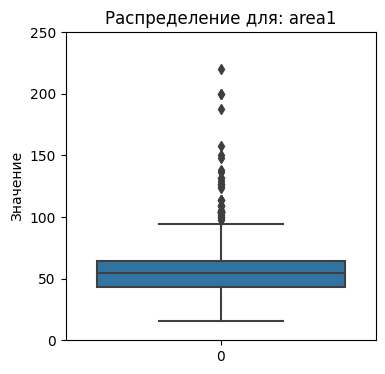

In [ ]:
# посмотрим на графики boxplot для area1
plt.figure(figsize=(4,4))
sns.boxplot(data=df['area1'])
plt.title('Распределение для: area1')
plt.ylabel('Значение')
plt.ylim(0,250)
plt.show()

Основные значения по Общей площади лежат в интервале от 16кв до 100кв

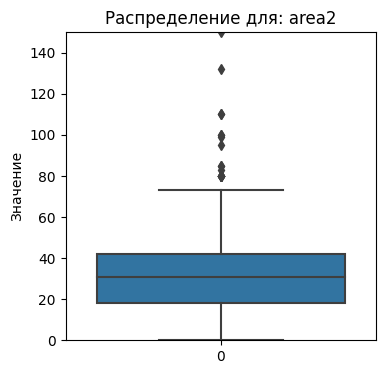

In [ ]:
# посмотрим на графики boxplot для area2
plt.figure(figsize=(4,4))
sns.boxplot(data=df['area2'])
plt.title('Распределение для: area2')
plt.ylabel('Значение')
plt.ylim(0,150)
plt.show()

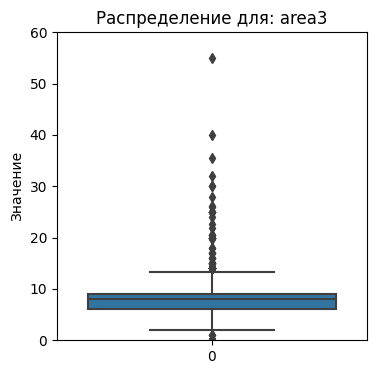

In [ ]:
# посмотрим на графики boxplot для area3
plt.figure(figsize=(4,4))
sns.boxplot(data=df['area3'])
plt.title('Распределение для: area3')
plt.ylabel('Значение')
plt.ylim(0,60)
plt.show()

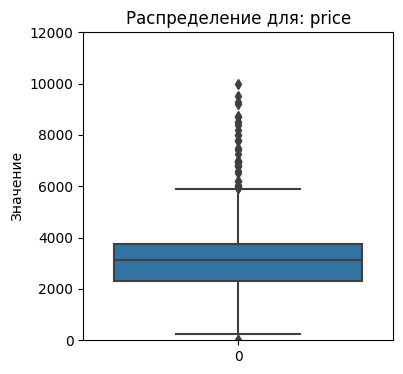

In [ ]:
# посмотрим на графики boxplot для price
plt.figure(figsize=(4,4))
sns.boxplot(data=df['price'])
plt.title('Распределение для: price')
plt.ylabel('Значение')
plt.ylim(0,12000)
plt.show()

99.73% цен всей выборки квартир лежат в диапазоне от 0т.р. до 6000т.р.

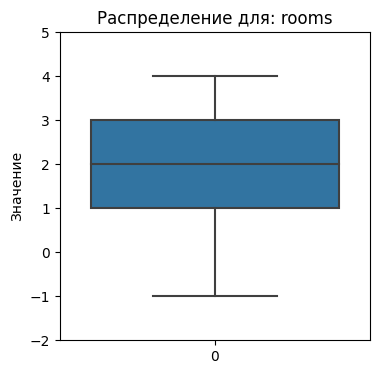

In [ ]:
# посмотрим на графики boxplot для rooms
plt.figure(figsize=(4,4))
sns.boxplot(data=df['rooms'])
plt.title('Распределение для: rooms')
plt.ylabel('Значение')
plt.ylim(-2,5)
plt.show()

Здесь просто: распределение комнат у нас от нашего заданого значения -1 для тех что помечены как многокомнатные и до 4 комнатных квартир.

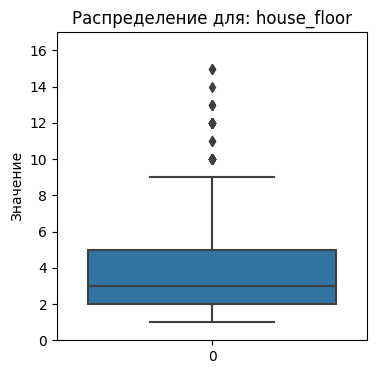

In [ ]:
# посмотрим на графики boxplot для house_floor
plt.figure(figsize=(4,4))
sns.boxplot(data=df['house_floor'])
plt.title('Распределение для: house_floor')
plt.ylabel('Значение')
plt.ylim(-0,17)
plt.show()

Основная масса этажности от 1 до 9

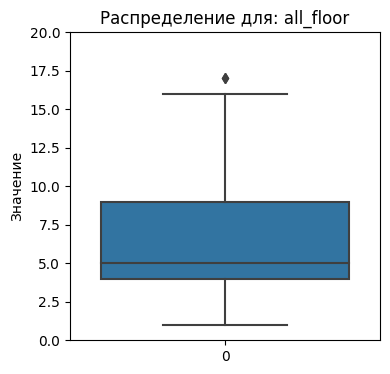

In [ ]:
# посмотрим на графики boxplot для all_floor
plt.figure(figsize=(4,4))
sns.boxplot(data=df['all_floor'])
plt.title('Распределение для: all_floor')
plt.ylabel('Значение')
plt.ylim(-0,20)
plt.show()

Диапазон высоты зданий в основном от 1 до 16 этажей 

## Убираем выбросы

Исходя из описательных статистик и минимумом-максимумов, все значения в пределах нормального распределения, скошенности влево или вправо практически нет, так что с данним набором отсекать выбросы вне диапазона 3 сигм

## Проанализируем записимость стоимости от других параметров

In [ ]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 4, 3

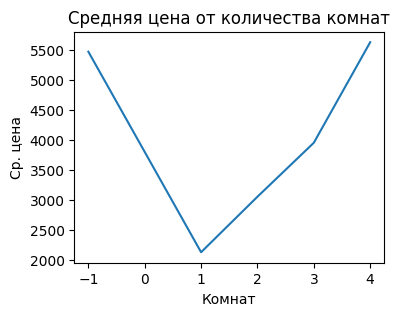

In [ ]:
# средняя цена от комнат
df.groupby('rooms')['price'].mean().plot()
plt.title('Средняя цена от количества комнат')
plt.xlabel('Комнат')
plt.ylabel('Ср. цена')
plt.show()

Значение -1 по комнатам это многокомнатные, т.к. мы выбрали категориальное значение для многокомнатных -1. В целом ускорение цены идет после 3 комнатных, корреляция прямая.

In [ ]:
# #увеличим дефолтный размер графиков
# from pylab import rcParams
# rcParams['figure.figsize'] = 8, 7

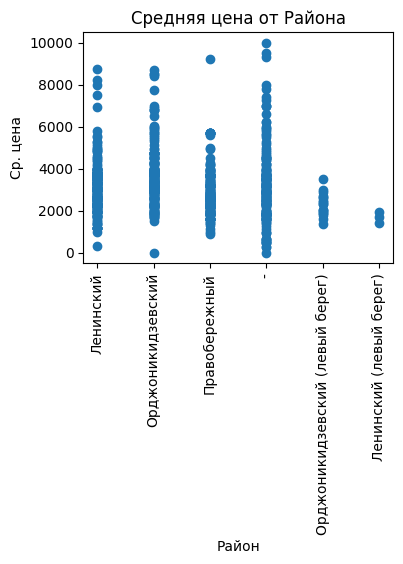

In [ ]:
# средняя цена от Района
plt.scatter(df['district'], df['price'])
plt.title('Средняя цена от Района')
plt.xlabel('Район')
plt.ylabel('Ср. цена')
plt.xticks(rotation=90)
plt.show()

Квартиры в Ленинском и Орджоникидзевском районе самые дорогие, Левый берег в дешевом сегменте. Не зная рынка можно предположить, что это старый жилищный фонд, город начал развиваться в другом направлении.

In [ ]:
# выведем топ 10 самых "дорогих" районов
top_price_districts10 = df.groupby('district')['price'].agg(['mean']).sort_values(by='mean', ascending=False).iloc[:10].reset_index()
display(top_price_districts10)
# выведем топ 3 самых "дорогих" районов
top_price_districts3 = df.groupby('district')['price'].agg(['mean']).sort_values(by='mean', ascending=False).iloc[:3].reset_index()
display(top_price_districts3)

,district,mean
0,Орджоникидзевский,3647.000000
1,-,3173.172973
2,Ленинский,3166.540084
3,Правобережный,2905.010582
4,Орджоникидзевский (левый берег),2299.222222
5,Ленинский (левый берег),1693.333333


,district,mean
0,Орджоникидзевский,3647.000000
1,-,3173.172973
2,Ленинский,3166.540084


<Figure size 1500x1500 with 0 Axes>

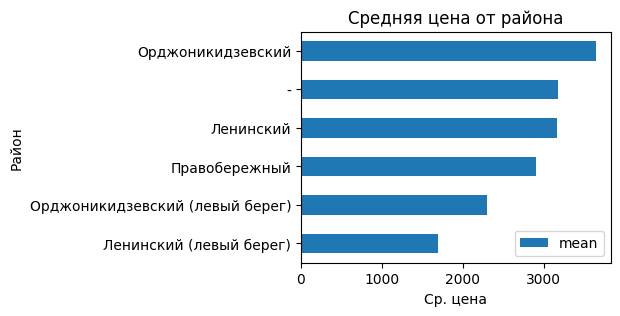

In [ ]:
# средняя цена от района (отфильтруем по количеству квартир на район, возьмем порог 0)
plt.figure(figsize=(15,15))
most_freq = df[ df.groupby('district')['price'].transform('count')>0 ] # фильтр по частоте встречаемости в выборке (анализируем наиболее частые значения)
most_freq.groupby('district')['price'].agg(['mean']).sort_values(by='mean').plot(kind='barh', label='Цена')
plt.title('Средняя цена от района')
plt.ylabel('Район')
plt.xlabel('Ср. цена')
#plt.xticks(rotation=90)
#plt.legend()
plt.show()

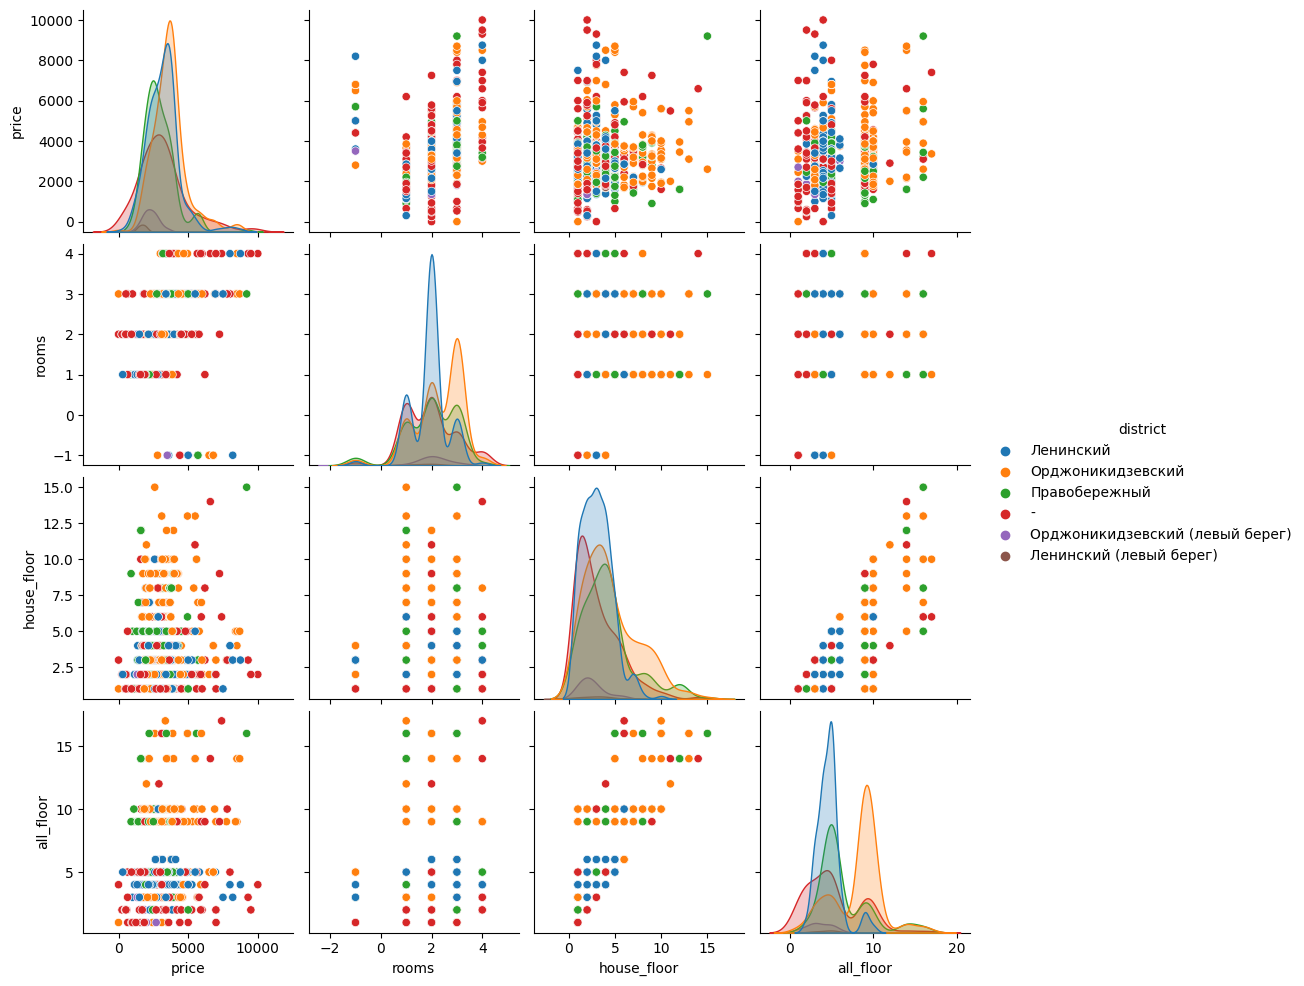

In [ ]:
# отобразим парные взаимосвязи для наших топ районов, как самые конкурентные по отношению к друг другу
df_price_districts10 = df[ df['district'].isin(top_price_districts10['district']) ] # фильтр самых топовых районов из датафрейма
top_district_columns = ['street', 'price', 'rooms', 'house_floor', 'all_floor', 'district']
sns.pairplot(df_price_districts10[top_district_columns], hue='district') # парные взаимосвязи
plt.show()

Поскольку самые дорогие или точнее "растущие" районы это Ленинский и Орджоникидзевский, то на парноми распределении это подтверждается, что основное распределение в этой группе на этажность высоких зданий и меньшее количество комнат, что говорит о рынке бюджетных квартир малой комнатности и в высотных зданиях.
Левый берег (Ленинский и Орджоникидзевский) плохо представлен в выборке, что подтверждает гипотезу о старом фонде и, судя по распределению, выбывающем из активности рынка данной группы.

In [ ]:
# посмотрим процент квартир где район не указан
print( 'Процент квартир где район не указан: {0:.2%}'.format(len(df[df['district']=='-'])/len(df)) )

Процент квартир где район не указан: 21.02%


Как оказалось, красные точки с не указаным районом состоавляют не более четверти из общей массы.

In [ ]:
# выведем топ 10 самых "дорогих" улиц
top_price_streets10 = df.groupby('street')['price'].agg(['mean']).sort_values(by='mean', ascending=False).iloc[:10].reset_index()
display(top_price_streets10)
# выведем топ 3 самых "дорогих" улиц
top_price_streets3 = df.groupby('street')['price'].agg(['mean']).sort_values(by='mean', ascending=False).iloc[:3].reset_index()
display(top_price_streets3)

,street,mean
0,ул Горького,10000.0
1,Комарова,8750.0
2,пл. Ленина,8500.0
3,133/1,8400.0
4,Крылова,7500.0
5,5/2 ул. Торфяная,7375.0
6,Ярославского,7250.0
7,ул Оранжерейная,7000.0
8,ул. Торфяная,6445.0
9,ул Суворова,6300.0


,street,mean
0,ул Горького,10000.0
1,Комарова,8750.0
2,пл. Ленина,8500.0


<Figure size 1500x1500 with 0 Axes>

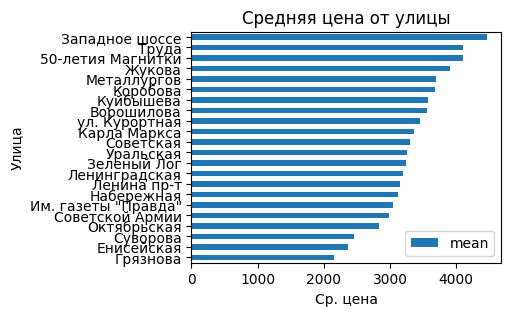

In [ ]:
# средняя цена от улицы (отфильтруем по количеству квартир на улицу, возьмем порог 9)
plt.figure(figsize=(15,15))
most_freq = df[ df.groupby('street')['price'].transform('count')>9 ] # фильтр по частоте встречаемости в выборке (анализируем наиболее частые значения)
most_freq.groupby('street')['price'].agg(['mean']).sort_values(by='mean').plot(kind='barh', label='Цена')
plt.title('Средняя цена от улицы')
plt.ylabel('Улица')
plt.xlabel('Ср. цена')
#plt.xticks(rotation=90)
#plt.legend()
plt.show()

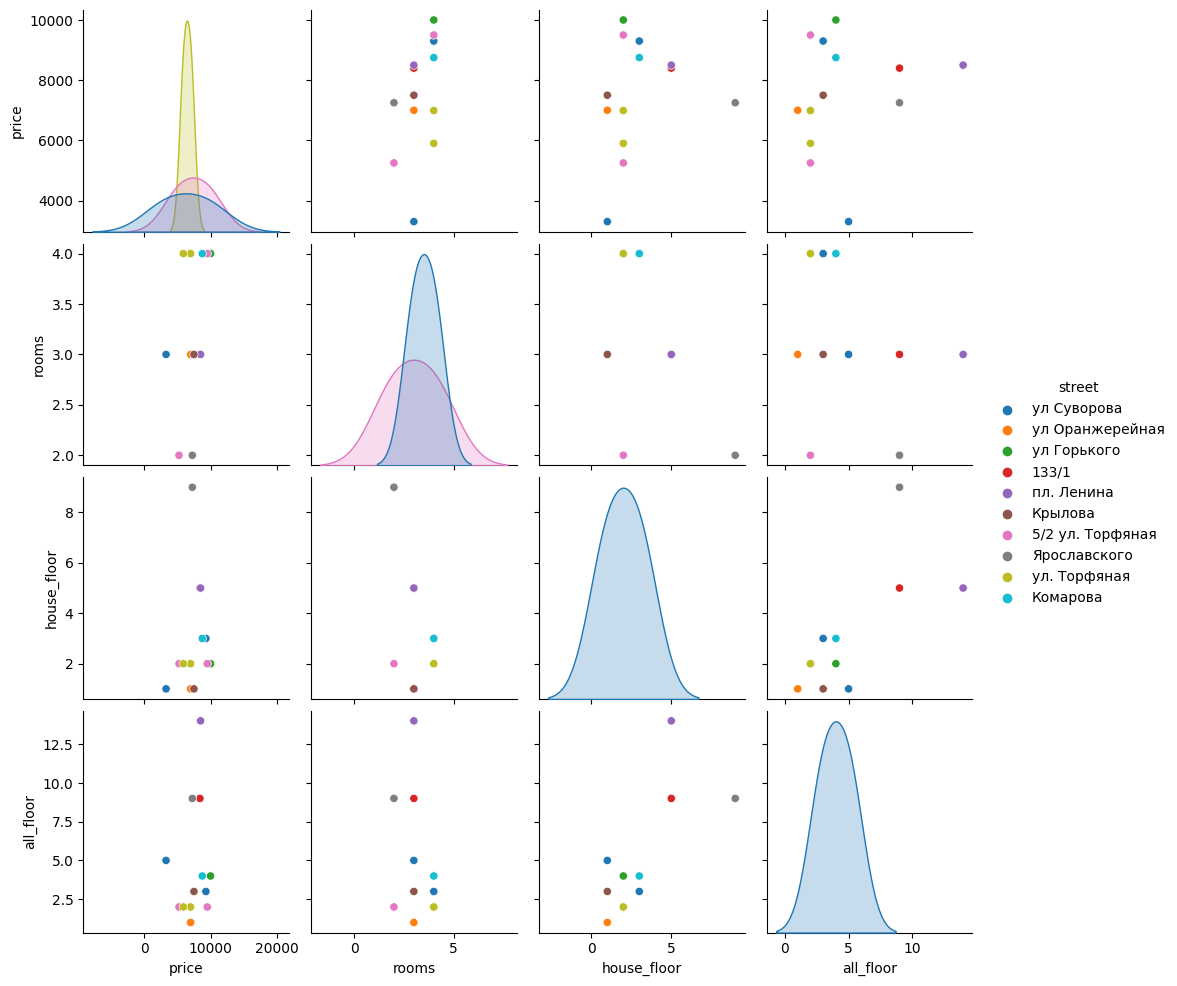

In [ ]:
# отобразим парные взаимосвязи для наших топ улиц, как самые конкурентные по отношению к друг другу
df_price_streets10 = df[ df['street'].isin(top_price_streets10['street']) ] # фильтр самых топовых улиц из датафрейма
top_street_columns = ['street', 'price', 'rooms', 'house_floor', 'all_floor', 'district']
sns.pairplot(df_price_streets10[top_street_columns], hue='street') # парные взаимосвязи
plt.show()

Две топ улицы (Ленина, Ярославского) имеют предложения выше среднего по рынку в квартирах на высоких этажах, вероятно с хорошим видом, т.к. основная масса дорогих квартир в городе в 5ти этажках.

На Ярославского есть многоквартирные апартаменты. На Суворова, Торяной и Комарова есть 4х комнатные квартиры.

Самые дорогие предложения на Суворова, Горькова, Торфяной и Комарова. 

In [ ]:
df.head()

,planning,district,area1,area2,area3,comment,price,agency,rooms,street,house1,house2,house3,house_floor,all_floor
0,раздельная,Ленинский,57.0,35.0,8.0,Трехкомнатная квартира нестандартной планировк...,2850,Выбор,3,Куйбышева,12,-1,-,1,3
1,нестандартная,Орджоникидзевский,98.5,60.0,15.0,Продам трехкомнатную квартиру 100кв.м. Простор...,6990,"""Шанс""",3,50-летия Магнитки,31,-1,-,3,9
2,старой планировки,Ленинский,83.0,55.0,9.0,ПРОДАМ трехкомнатную квартиру старой планировк...,5100,-,3,Менделеева,6,-1,-,3,4
3,малосемейка,Правобережный,30.4,17.0,6.0,Квартира малосемейка в хорошем состоянии. П...,1790,Визит,1,Ленина пр-т,98,1,-,7,9
4,-,Ленинский,77.0,48.0,9.0,КВАРТИРА СТАРОЙ ПЛАНИРОВКИ С ВЫСОКИМИ ПОТОЛКА...,3990,Визит,3,Ленина пр-т,10,-1,-,5,5


In [ ]:
print(list(df.columns))

['planning', 'district', 'area1', 'area2', 'area3', 'comment', 'price', 'agency', 'rooms', 'street', 'house1', 'house2', 'house3', 'house_floor', 'all_floor']


<ipython-input-49-ae77112aa053>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_numeric.corr('spearman') #pearson #spearman # КОРРЕЛЯЦИЯ КРИТЕРИЙ СПИРМЕНА потому что имеем дело не с нормальным распределением значений


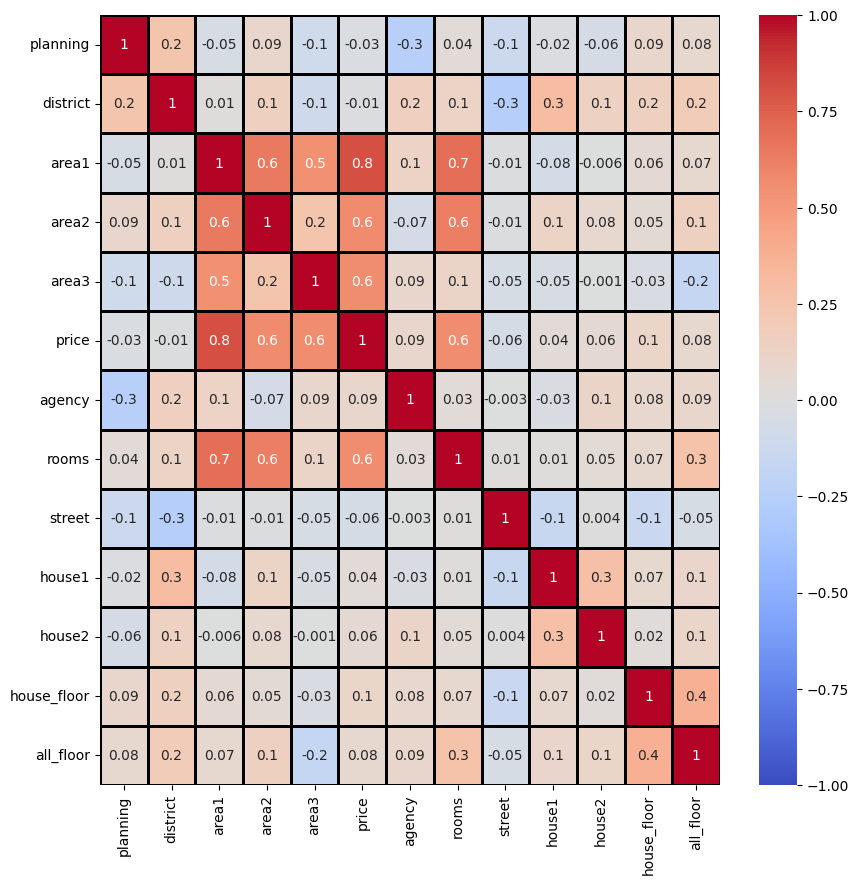

In [ ]:
# посмотрим на корреляцию категориальных данных
df_numeric = df.copy() # копия датасета
le = LabelEncoder() # создаем LabelEncoder
df_num_cols = ['planning', 'district', 'agency', 'rooms', 'street', 'house_floor', 'all_floor'] # все категориальные столбцы

for col in df_num_cols: # пройдем по ним отдельно
  df_numeric[col] = le.fit_transform(df_numeric[col].astype(str)) # обучаем енкодер и переводим в числовые категории значения
corr_matrix = df_numeric.corr('spearman') #pearson #spearman # КОРРЕЛЯЦИЯ КРИТЕРИЙ СПИРМЕНА потому что имеем дело не с нормальным распределением значений
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g') 
plt.show()

Заметная (0.5-0.7) корреляция у количества комнат с ценой и жилой площадью квартиры.

Высокая (0.7-0.9) корреляция у количества комнат и общей площадью.
Также высокая корреляция у цены с общей площадью, и заметная с площадями жилой и кухни.
  


# Подготовка датасета для обучения нейросети

In [ ]:
# функция сохранения объекта
def save_obj(obj_to_save, filename):
  with open(filename, 'wb') as f:
    pickle.dump(obj_to_save, f, protocol=pickle.HIGHEST_PROTOCOL) # saving
# функция загрузки обьекта
def load_obj(filename):
  with open(filename, 'rb') as f:
    return pickle.load(f) # loading

# категориальные и числовые столбцы
object_cols = ['district', 'street', 'house_floor', 'planning', 'rooms']
numeric_cols = ['area1', 'area2', 'price']
text_cols = ['comment']
all_cols = object_cols + numeric_cols + text_cols

In [ ]:
# все столбцы
print(list(df.columns))

['planning', 'district', 'area1', 'area2', 'area3', 'comment', 'price', 'agency', 'rooms', 'street', 'house1', 'house2', 'house3', 'house_floor', 'all_floor']


In [ ]:
# оставим только интересующие нас столбцы для нейросети
df = df[['district', 'street', 'house_floor', 'planning', 'rooms', 'area1', 'area2', 'price', 'comment']].copy()
print(list(df.columns))

['district', 'street', 'house_floor', 'planning', 'rooms', 'area1', 'area2', 'price', 'comment']


In [ ]:
df.to_csv('citystar-parsed.csv', index=False) # сохраним датасет для модели